# Statistical Physics Simulations

# Ising Model

Baseline Ising Model results and plots for the the 1D Ising and 2D Ising models.

According to the Boltzmann distribution, it is not required that the system always remain in the state of lower energy, but the probability of finding a configuration with high energy is less than finding one with a lower energy. The fluctuation of the settings is given by the temperature in such a way that if $T\rightarrow0$ there will be no fluctuations and the system will remain in the state of lower energy.

The Ising model tries to describe the behavior of a chain of spins, like the one observed in the following image:

Where two consecutive spins in the same direction are said to be parallel and if they are in the opposite direction they are said to be antiparallel.
For this model, only the interaction between first neighbors is taken into account, starting from the following Hamiltonian:

$$\mathcal {H} = -J\sum_{\langle i,j\rangle}S_i S_j$$

### Metropolis algorithm

## Results 1D

### Evolution of the system over a thousand time steps

The evolution of the model for a chain of 150 spins with different conditions (both material and environment) is presented below.

The chain is represented on the vertical axis while time progresses on the horizontal axis.
Metropolis, Rosenbluth, Teller and Teller (Metropolis et al, 1953) invented a Monte Carlo algorithm where these conditions typical of the Boltzmann distribution are taken into account, in such a way that it appropriately simulates fluctuations during thermal equilibrium.

#### Steps:
1. Start with an arbitrary configuration of spins $ \alpha_k = ${$s_1, s_2, ... s_N$}, and calculate its energy (($E_{\alpha_{k}}$))
2. Generate a $\alpha_{tr}$ by choosing a position (randomly) i from the configuration and inverting its spin.
3. Calculate the energy of the test configuration ($ E_{\alpha_{tr}} $)
4. If $ E_{\alpha_{tr}} \leq E_{\alpha_{k}} $ then the test $\alpha_{k + 1}$ = $\alpha_{tr}$ is accepted
5. If $ E_{\alpha_{tr}}>E_{\alpha_{k}} $ the test configuration is accepted with a probability $\mathcal{P} = e^{\frac{-\Delta E}{K_BT}} $

By repeating this algorithm a considerable number of times, it is possible to simulate the thermal equilibrium of the system. And once in thermal equilibrium it is possible to calculate the thermodynamic properties of the system (internal energy, magnetization and specific heat).

For the ferromagnetic material the spins are organized in such a way that they mostly have parallel neighbors, while for the antiferromagnetic material the spins are organized in such a way that their neighbors are antiparallel. On the other hand, for high temperatures, the behavior of the system is highly dependent on the environment, and, contrary to what happens at low temperatures, the characteristics of the material do not significantly influence the organization of the spins, so it could be said that the ferromagnetic (or antiferromagnetic) properties of the material are lost and the behavior is that of a paramagnetic material.

### Equalibrium Thermodynamic Properties 

In the previous graphs it is possible to observe that the Ising 1D model describes appropriately (according to the theory) some things about the behavior of thermodynamic properties. For example, it describes that for temperatures close to 0 the internal energy of the system remains in its ground state, and as the temperature increases, so does the internal energy of the system. Regarding specific heat, the model describes that for high temperatures it becomes 0, but in this case it does not correctly describe the behavior for small temperatures, where a rather random behavior is observed in the case of atiferromagnetic materials, and for the In the case of ferromagnetics, although it predicts a peak (as expected theoretically), it does not occur close to the indicated value (Curie temperature), but much earlier. In addition, for magnetization in ferromagnetic materials, the behavior is generally well described, in which one passes from a completely magnetized material that, through the temperature bath, loses said magnetization, so for large T it is approximately 0, but the change occurs very drastically and at very low temperatures, contrary to what is theoretically expected, which is a slightly smoother change and close to the Curie temperature, while for antiferromagnetic materials it predicts a behavior random close to 0, as theoretically predicted. Finally, it is not possible to observe phase transitions clearly in the graphs, so it is not possible to use this model to find a value of the Curie temperature (temperature at which the phase transition occurs)

## Modelo de Ising 2D

## Results obtained in the 2D Ising model
Results for $100\times100$ spin system. 

The Ising 2D model is nothing more than the two-dimensional extrapolation of the Ising 1D model. That is, we take a network of $N\times N $ spins, where each spin only interacts with its 4 closest neighbors, so the Hamiltonian is exactly the same as that of the one-dimensional model.

As for the Metropolis algorithm, the algorithm is not modified when taking into account an additional dimension, so the change of a spin to find a test configuration is as follows:




For this type of models, the calculation time for the energy of the system is quite long since it is necessary to perform $2\times N\times N$ multiplications and $2\times N \times(N-1)$ sums for both the configuration $\alpha_k$ as for $\alpha_{tr}$, so it is better, when evolving the system, only calculate $\Delta E = E_{\alpha_{tr}} - E_{\alpha_k}$. For this we see that, since only one spin is modified, all the values in $E_{\alpha_k} $ will remain the same with the exception of those that are calculated using the inverted spin. In this way, we can observe that if the spin is modified at position (i, j), then: $$ \Delta E = 2 S_{i, j} (S_{i + 1, j} + S_{i- 1, j} + S_{i, j + 1} + S_{i, j-1}) $$
Reducing the number of operations from $4\times N\times N $ multiplications and $ 4\times N \times(N-1)$ adds to 3 additions and 2 multiplications.

# System `evolution` over 10,000 trial steps

# Thermodynamic properties (equilibrium system)
$100x100$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100 # Size of NxN lattice


def initial_lattice(N):
    '''
    Returns initial lattice
    input = N (length of edge)
    returns lattice = array(int, size = [N,N])
    '''
    return 2*np.random.randint(2,size=[N,N])-1

In [3]:
grid=initial_lattice(N)
grid

array([[-1,  1, -1, ..., -1, -1,  1],
       [-1,  1,  1, ...,  1, -1,  1],
       [-1,  1, -1, ..., -1,  1, -1],
       ...,
       [ 1,  1, -1, ..., -1, -1,  1],
       [ 1, -1, -1, ..., -1, -1, -1],
       [-1,  1, -1, ...,  1,  1, -1]])

In [4]:
def get_Energy(lattice):
    '''
    Calculates energy of a given lattice
    input lattice = array(int, size = [N,N])
    returns Energy = float
    '''
    E = 0
    for i in range(len(lattice)):
        for j in range(len(lattice)):
            s = lattice[i,j]
            d_s = lattice[(i+1)%N,j] + lattice[(i-1)%N, j] + lattice[i, (j+1)%N] + lattice[i, (j-1)%N]
            E += float(-s*d_s/4.)
    return E

def get_Mag(lattice):
    '''
    Calculates magnetisation of a given lattice
    input lattice =  array(int, size = [N,N])
    returns mag = float
    '''
    mag = np.sum(lattice)
    return mag

In [5]:
print('Energy=',get_Energy(grid),',','Magnetisation=',get_Mag(grid))

Energy= 32.0 , Magnetisation= -84


In [6]:
def Metropolis(lattice, n, Beta, energy):
    '''
    Metropolis algorithm for a given lattice, Beta for n steps.
    Calculates magnetisation and energy for each accepted step.
    input lattice - array(int, size = [N,N])
    input n = int
    input Beta = float
    input energy = float
    net_spins = array(float, size = n)
    net_energy = array(float, size = n)
    '''
    net_energy = np.zeros(n)
    net_spins = np.zeros(n)
    for i in range(n):
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = lattice[x,y]
        spin_f = -spin_i
        E_i = 0
        E_f = 0
        d_s = lattice[(x+1)%N,y] + lattice[(x-1)%N, y] + lattice[x, (y+1)%N] + lattice[x, (y-1)%N]
        E_i += -spin_i*d_s
        E_f += -spin_f*d_s
        Delta_E = E_f - E_i
        if Delta_E <= 0:
            lattice[x,y] = spin_f
            energy += Delta_E
        elif (Delta_E > 0)*(np.random.random() < np.exp(-Delta_E*Beta)):
            lattice[x,y] = spin_f
            energy += Delta_E
        net_energy[i] = energy
        net_spins[i] = lattice.sum()
    return net_spins, net_energy

In [7]:
Metropolis(grid,100,0.2,get_Energy(grid))


(array([-86., -84., -82., -82., -80., -78., -78., -80., -78., -76., -78.,
        -76., -78., -78., -80., -80., -78., -76., -78., -78., -76., -74.,
        -76., -76., -74., -72., -70., -72., -70., -68., -70., -72., -74.,
        -76., -76., -78., -76., -78., -76., -74., -76., -74., -74., -74.,
        -76., -74., -76., -74., -72., -74., -76., -76., -78., -76., -78.,
        -80., -80., -80., -78., -76., -74., -74., -76., -74., -74., -72.,
        -70., -68., -70., -70., -72., -74., -74., -72., -70., -72., -70.,
        -72., -74., -72., -74., -72., -74., -72., -74., -76., -78., -80.,
        -78., -78., -80., -78., -80., -82., -84., -86., -84., -82., -82.,
        -84.]),
 array([ 36.,  40.,  36.,  36.,  44.,  44.,  44.,  40.,  40.,  36.,  40.,
         36.,  32.,  32.,  36.,  36.,  40.,  36.,  32.,  32.,  36.,  32.,
         32.,  32.,  32.,  32.,  24.,  24.,  24.,  20.,  24.,  24.,  24.,
         20.,  20.,  20.,  20.,  16.,  16.,  16.,  16.,   8.,   8.,   8.,
          8.,   8.,  1

In [8]:
s, e = Metropolis(initial_lattice(N),10,0.5,get_Mag(initial_lattice(N)))

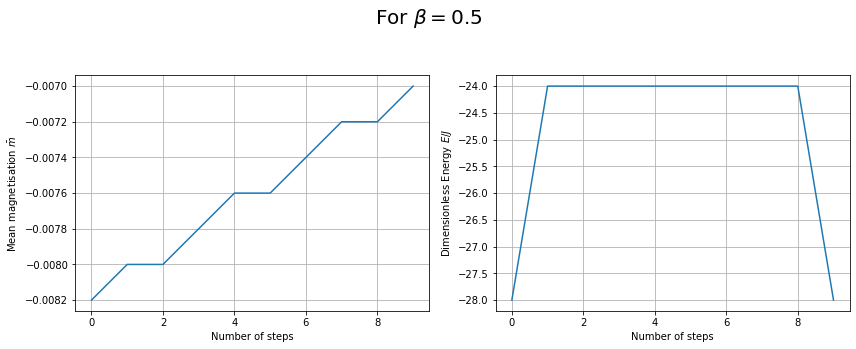

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(s/N**2)
ax.set_xlabel('Number of steps')
ax.set_ylabel(r'Mean magnetisation $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(e)
ax.set_xlabel('Number of steps')
ax.set_ylabel(r'Dimensionless Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'For $\beta=$0.5', y=1.2, size=20)
plt.show()

In [46]:
Metropolis(grid,10,0.2,get_Energy(grid))

(array([-112., -112., -114., -114., -116., -114., -112., -114., -112.,
        -114.]),
 array([-158., -158., -158., -158., -166., -162., -166., -166., -166.,
        -162.]))

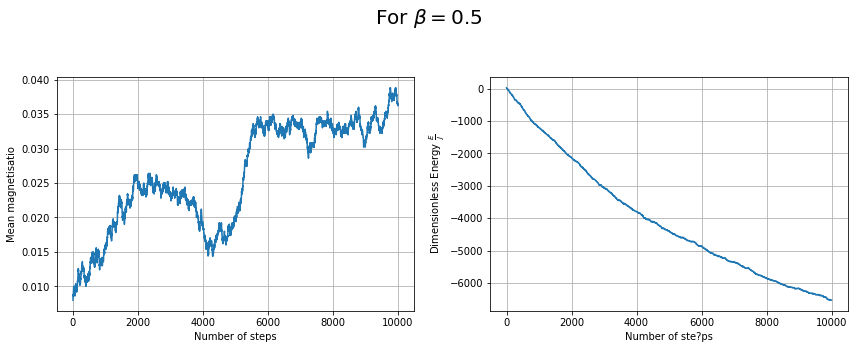

In [47]:
s, e = Metropolis(initial_lattice(N),10000,0.5,get_Mag(initial_lattice(N)))
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(s/N**2)
ax.set_xlabel('Number of steps')
ax.set_ylabel(r'Mean magnetisatio')
ax.grid()
ax = axes[1]
ax.plot(e)
ax.set_xlabel('Number of ste?ps')
ax.set_ylabel(r'Dimensionless Energy $\frac{E}{J}$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'For $\beta=$0.5', y=1.2, size=20)
plt.show()

Although the long-term behavior observed in this model is similar to that observed in the one-dimensional model, in this one it is possible to observe the phase transition at critical temperature ($T_c \approx 2.27$) where the system passes from having a magnetization and behaving like a ferromagnetic (or antiferromagnetic) material to behaving like a paramagnetic material without any preference for any configuration of the spins. Furthermore, it is possible to observe the expected behavior in the specific heat, which indicates that for the vicinity of $T_c$ it diverges, and in temperatures far from $T_c$ it becomes close to 0.

BJ = $\beta\mathcal{J}$

In [48]:

def get_e_s(lattice, BJs):
    '''
    Returns mean magnetisation, mean energy and standard deviation of an energy for certain values of BJ
     input lattice: array(int, size = [N,N])
     input BJs = float
     return ms = float
     return E_means = float
     return E_stds = float
    '''
    ms = np.zeros(len(BJs))
    E_means = np.zeros(len(BJs))
    E_stds = np.zeros(len(BJs))
    for i, bj in enumerate(BJs):
        spins, energies = Metropolis(lattice, 100000, bj, get_Energy(lattice))
        ms[i] = spins[-10000:].mean()/N**2      # mean and standard deviation for 10000 neighbours
        E_means[i] = energies[-10000:].mean()
        E_stds[i] = energies[-10000:].std()
    return ms, E_means, E_stds

In [49]:
BJs = np.arange(0.1, 3, 0.05)
ms_n, E_means_n, E_stds_n = get_e_s(initial_lattice(N), BJs)#use get_e_s to retrieve list of floats in order to plot returned values

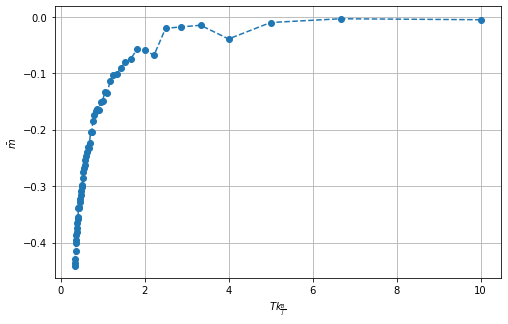

In [56]:
plt.figure(figsize=(8,5))
plt.plot(1/BJs, ms_n, 'o--')
plt.xlabel(r'$Tk_{\frac{B}{J}}$')
plt.ylabel(r'$\bar{m}$')
plt.grid()
plt.show()

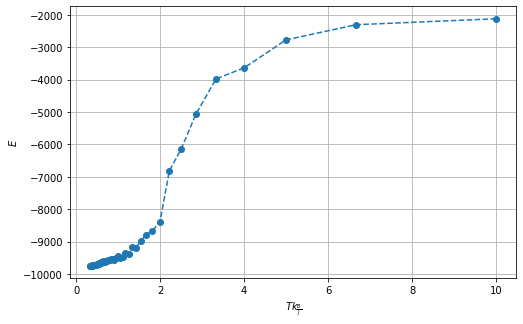

In [54]:
plt.figure(figsize=(8,5))
plt.plot(1/BJs, E_means_n, 'o--')
plt.xlabel(r'$Tk_{\frac{B}{J}}$')
plt.ylabel(r'$E$')
plt.grid()
plt.show()

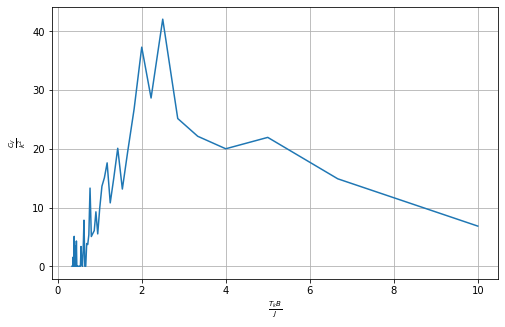

In [52]:
plt.figure(figsize=(8,5))
plt.plot(1/BJs, E_stds_n*BJs)
plt.xlabel(r'$\frac{T_kB}{J}$')
plt.ylabel(r'$\frac{C_V}{k^2}$')
plt.grid()
plt.show()